# Itération 1 : Exploration préliminaire du dataset “Arbres” 

Extraire l’ensemble des lignes (rows) et stocker ces informations dans une variable de type List 
○ Doc officielle sur les csv : 
https://docs.python.org/3/library/csv.html 
○ Doc officielle sur les list (tutoriel) : 
https://docs.python.org/fr/3/tutorial/introduction.html#lists 

In [2]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [3]:
!ls

20210316_arbres.ipynb  arbres.ipynb


In [4]:
import csv
import matplotlib
import matplotlib.pyplot as plt

In [5]:
with open('../data/arbres.csv', newline='') as f:
    reader=csv.reader(f)
    data=list(reader)

Extraire la première et la seconde ligne du fichier puis extraire la 2nd colonne.

In [6]:
d0 = data[0]
d1 = data[1]
#print(d0)
#print(d1)
c2_data = [row[1] for row in data[1:]]
#print(tmp)

récupérer la colonne correspondant à l'année de plantation
la lg suivante permet d'extraire la colonne 19 dans le fichier data
en omettant la première ligne qui correspond au titre

In [7]:
annees = [row[19] for row in data[1:]]
#annees

Afficher les 50 premières lignes et les 50 dernières lignes de cette liste. ○ List slicing : https://www.geeksforgeeks.org/python-list-slicing/ 

In [8]:
p50 = annees[0:50]
d50 = annees[len(annees)-50:len(annees)]
#print(p50)
#print(d50)

Combien d’arbres sont recensés dans ce jeu de données ? 
○ Function len : https://www.w3schools.com/python/ref_func_len.asp

In [9]:
len(annees)

31874

Pour combien d’arbres manque-t-il l’information concernant la date de plantation ? (Vous pouvez essayer de le faire d’au moins deux manières différentes.) 
○ Function count : 
https://www.programiz.com/python-programming/methods/list/count


In [10]:
count_missing = annees.count('')
# print count
print('The count of empty is:', count_missing)

The count of empty is: 1007


❏ Combien d’arbres ont été plantés l’année de votre naissance ? 

In [11]:
yb = 1987 #year of birth
#replace '' by 0
annees_c=list(annees) #copy list annees
tmp=[annees_c.remove('') for n in annees_c[:] if n==''] #remove '' in list annees_c
#count trees since year of birth
count_sinceb = [n for n in annees_c[:] if float(n) >= yb] #get the year of plantation if it's in or after birthyear
print("Since you were born",len(count_sinceb),"trees were planted in Grenoble")

Since you were born 15088 trees were planted in Grenoble


Quelle est la plus ancienne année de plantation recensée dans ce dataset ? La plus récente ? 

In [12]:
annees_min=min(annees_c)
annees_max=max(annees_c)
print("First tree was planted in Grenoble in",annees_min)
print("Last tree was planted in Grenoble in",annees_max)

First tree was planted in Grenoble in 1924
Last tree was planted in Grenoble in 2019


Combien d’arbres ont été plantés année par année (ex : 1987 : 771, 1988 : 266, etc…) ?

In [13]:
list_annees=list(range(int(annees_min),int(annees_max)))
count_by_year=[{str(n):annees_c.count(str(n))} for n in list_annees if annees_c.count(str(n))!=0]
#print(count_by_year)

 Combien d’arbres ont été plantés en moyenne chaque année ? ○ Moyenne d’une liste de deux manières : 
https://www.geeksforgeeks.org/find-average-list-python/ 

In [14]:
list_count_by_year=[annees_c.count(str(n)) for n in list_annees if annees_c.count(str(n))!=0]
list_year_exist=[n for n in list_annees if annees_c.count(str(n))!=0]
#print(list_year_exist)

# Python program to get average of a list 
def Average(lst): 
    return sum(lst) / len(lst) 

average_tree_year = round(Average(list_count_by_year)) 
print(average_tree_year)

506


 Quel Maire a planté le plus d’arbres à Grenoble ? 
 
liste maire par annee = http://dictionnaire.sensagent.leparisien.fr/Liste%20des%20maires%20de%20Grenoble/fr-fr/

In [15]:
def trees_by_mayor(m,deb_mandat):
    if m == (len(deb_mandat)-1) :
        L_years = list(range(deb_mandat[m],2022))
    else :        
        L_years = list(range(deb_mandat[m],deb_mandat[m+1]))
#    print(L_years)

    nb_trees=0
    for n in range(len(L_years)):
        if annees_c.count(str(L_years[n]))!=0 :
            nb_trees=annees_c.count(str(L_years[n]))+nb_trees      
    return nb_trees

#%%%%%%%%%%%%%%%%% Code à améliorer %%%%%%%%%%%%%%%%%%%%%%
'''maires = {
    "Paul Mistral":1924,
    "Hubert Dubedout":1965,
    "Eric Piolle":2014
}
for m,y in maires.items():
    print("maire :", m)
    print("Année :", y)
    
    
maires = ["Paul", "Pierre", "Jacques"]
annees = [1952, 1963, 1969]
for m, y in zip(maires, annees):
    print("maire :", m)
    print("Année :", y)'''

deb_mandat=[1924,1932, 1935,1944,1945,1947,1948,1949,1959,1965,1983,1995,2014]
maires=["Paul Mistral","Leon Martin","Paul Cocat","Frédéric Lafleur","Léon Martin","Marius Bally",\
"Raymond Perinetti","Léon Martin","Albert Michallon","Hubert Dubedout","Alain Carignon",\
"Michel Destot", "Eric Piolles"]
#print(len(deb_mandat))
max_trees_maire=0
for n in range(len(deb_mandat)):
    trees_m=trees_by_mayor(n,deb_mandat)
    if trees_m>max_trees_maire :
        ind_trees=n
        max_trees_maire=trees_m
        
print(maires[ind_trees],"est le maire qui a planté le plus d'arbres, respectivement",max_trees_maire )

Hubert Dubedout est le maire qui a planté le plus d'arbres, respectivement 12394


Récupérez maintenant l’information concernant le genre botanique et la stocker conjointement avec l’année de plantation dans un tuple. Les tuples seront stockés dans une liste (ex : [ (‘1987’, 771), (‘1988’, 266), ….. ] ) ○ Les tuples en python : https://courspython.com/tuple.html 

In [16]:
ind = d0.index('GENRE_BOTA')
genre = [row[ind] for row in data[1:]]
annees_g = [row[19] for row in data[1:]]
annees_genre=zip(annees_g,genre)
random = list(annees_genre)
print(random)

[('2013', 'Acer'), ('2013', 'Acer'), ('2013', 'Acer'), ('2018', 'Acer'), ('2013', 'Acer'), ('2013', 'Acer'), ('2013', 'Acer'), ('2013', 'Acer'), ('2013', 'Acer'), ('2013', 'Acer'), ('2013', 'Acer'), ('2013', 'Acer'), ('2013', 'Acer'), ('2013', 'Acer'), ('2013', 'Acer'), ('2013', 'Acer'), ('2013', 'Acer'), ('2013', 'Acer'), ('2013', 'Acer'), ('1970', 'Acer'), ('1970', 'Ulmus'), ('1970', 'Acer'), ('1970', 'Acer'), ('1970', 'Acer'), ('1970', 'Acer'), ('1970', 'Ulmus'), ('1970', 'Acer'), ('1970', 'Acer'), ('1970', 'Acer'), ('1970', 'Acer'), ('1970', 'Acer'), ('1970', 'Acer'), ('1970', 'Acer'), ('1970', 'Acer'), ('1970', 'Acer'), ('1970', 'Acer'), ('1970', 'Acer'), ('1970', 'Acer'), ('1970', 'Acer'), ('2013', 'Acer'), ('1990', 'Albizia'), ('1990', 'Ficus'), ('1990', 'Cupressus'), ('', 'Acer'), ('2013', 'Acer'), ('2013', 'Acer'), ('2013', 'Cornus'), ('1950', 'Platanus'), ('1975', 'Acer'), ('2001', 'Acer'), ('2001', 'Morus'), ('2001', 'Acer'), ('2001', 'Morus'), ('2001', 'Liquidambar'), ('198

(plus dur) Triez les tuples en fonction de l’année de plantation par ordre décroissant.

In [17]:
# take the second element for sort
tmp = sorted(random, key=lambda y: y[0], reverse=True)
tmp

[('2019', 'Koelreuteria'),
 ('2019', 'Alnus'),
 ('2019', 'Acer'),
 ('2019', 'Prunus'),
 ('2019', 'Prunus'),
 ('2019', 'Euodia'),
 ('2018', 'Acer'),
 ('2018', 'Prunus'),
 ('2018', 'Prunus'),
 ('2018', 'Prunus'),
 ('2018', 'Prunus'),
 ('2018', 'Corylus'),
 ('2018', 'Prunus'),
 ('2018', 'Prunus'),
 ('2018', 'Malus'),
 ('2018', 'Pyrus'),
 ('2018', 'Prunus'),
 ('2018', 'Prunus'),
 ('2018', 'Juglans'),
 ('2018', 'Pyrus'),
 ('2018', 'Malus'),
 ('2018', 'Sambucus'),
 ('2018', 'Malus'),
 ('2018', 'Pyrus'),
 ('2018', 'Salix'),
 ('2018', 'Sambucus'),
 ('2018', 'Prunus'),
 ('2018', 'Prunus'),
 ('2018', 'Prunus'),
 ('2018', 'Amélanchier'),
 ('2018', 'Fagus'),
 ('2018', 'Fagus'),
 ('2018', 'Maclura'),
 ('2018', 'Fraxinus'),
 ('2018', 'Calocedrus'),
 ('2018', 'Calocedrus'),
 ('2018', 'Calocedrus'),
 ('2018', 'Malus'),
 ('2018', 'Corylus'),
 ('2018', 'Ficus'),
 ('2018', 'Ficus'),
 ('2018', 'Mespilus'),
 ('2018', 'Punica'),
 ('2018', 'Pyrus'),
 ('2018', 'Prunus'),
 ('2018', 'Prunus'),
 ('2018', 'Prunus

Pour combien d'arbres manque-t-il l’information concernant le genre botanique ? 

In [18]:
#for y, g in annees_genre:
#    print("annee :", y)
#    print("genre :", g)
count_missing = list(annees_genre).count('')
#print count
print('The count of empty is:', count_missing)

The count of empty is: 0


In [19]:
# take the second element for sort
tmp = sorted(random, key=lambda y: y[0], reverse=True)
tmp

[('2019', 'Koelreuteria'),
 ('2019', 'Alnus'),
 ('2019', 'Acer'),
 ('2019', 'Prunus'),
 ('2019', 'Prunus'),
 ('2019', 'Euodia'),
 ('2018', 'Acer'),
 ('2018', 'Prunus'),
 ('2018', 'Prunus'),
 ('2018', 'Prunus'),
 ('2018', 'Prunus'),
 ('2018', 'Corylus'),
 ('2018', 'Prunus'),
 ('2018', 'Prunus'),
 ('2018', 'Malus'),
 ('2018', 'Pyrus'),
 ('2018', 'Prunus'),
 ('2018', 'Prunus'),
 ('2018', 'Juglans'),
 ('2018', 'Pyrus'),
 ('2018', 'Malus'),
 ('2018', 'Sambucus'),
 ('2018', 'Malus'),
 ('2018', 'Pyrus'),
 ('2018', 'Salix'),
 ('2018', 'Sambucus'),
 ('2018', 'Prunus'),
 ('2018', 'Prunus'),
 ('2018', 'Prunus'),
 ('2018', 'Amélanchier'),
 ('2018', 'Fagus'),
 ('2018', 'Fagus'),
 ('2018', 'Maclura'),
 ('2018', 'Fraxinus'),
 ('2018', 'Calocedrus'),
 ('2018', 'Calocedrus'),
 ('2018', 'Calocedrus'),
 ('2018', 'Malus'),
 ('2018', 'Corylus'),
 ('2018', 'Ficus'),
 ('2018', 'Ficus'),
 ('2018', 'Mespilus'),
 ('2018', 'Punica'),
 ('2018', 'Pyrus'),
 ('2018', 'Prunus'),
 ('2018', 'Prunus'),
 ('2018', 'Prunus

Utilisez Matplotlib pour tracer l’histogramme représentant le nombre d’arbres plantés par année. 
○ Exemple : 
https://www.kite.com/python/answers/how-to-plot-a-histogram-from-a-list-in-matplotlib-in-python 
○ Doc officielle : 
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html  

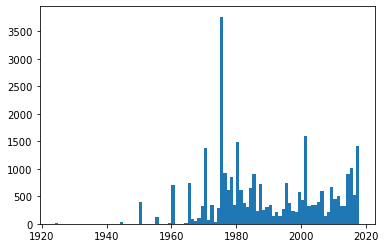

In [20]:
annees_c_int=[int(n) for n in annees_c]
matplotlib.pyplot.hist(annees_c_int,list_annees);

# Itération 2 : Analyse de l’état de la diversité des arbres
● Doc officielle : 

○ Timer : https://ipython.readthedocs.io/en/stable/interactive/magics.html 
○ Collections : https://docs.python.org/2/library/collections.html 
● Sets in Python : https://realpython.com/python-sets/ 
● Dictionaries in Python : https://realpython.com/python-dicts/ 
● Lien vers le dossier de presse : 
https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=5&cad=rja&uact=8&ved=2ahUKEwiPr-TSlI3mAhWPHh QKHSqLDGoQFjAEegQIChAC&url=https%3A%2F%2Fwww.grenoble.fr%2Fuploads%2FExterne%2F96%2F470_610_2-700- arbres-plantes-en-3-saisons.pdf&usg=AOvVaw1P0stH-XP1wSlvUxmsa6cN 

● Pour commencer, identifiez tous les genres botaniques représentés à Grenoble. Combien y en a-t-il ? Essayez plusieurs manières de résoudre ce problème. 

In [21]:
ind = d0.index('GENRE_BOTA')
genre = [row[ind] for row in data[1:]]

# On utilise la propriété du set qui fait qu'il ne peut pas
# y avoir deux éléments identique dans le même set ce qui
# élimine les doublons

print("Il y a",len(genre),"items dans la liste genre.")
genre_set=set(genre)
print("Il y a",len(genre_set)-1,"genres diférents dans la liste genre.")

# On réutilise le code de la fonction mot_autorise dans 
# Caséine

genre_sans_doublon=[]
for n in range(len(genre)) :
    if not genre[n] in genre_sans_doublon:
        genre_sans_doublon.append(genre[n])
print("Il y a",len(genre_sans_doublon)-1,"genres diférents dans la liste genre.")

Il y a 31874 items dans la liste genre.
Il y a 119 genres diférents dans la liste genre.
Il y a 119 genres diférents dans la liste genre.


● Identifiez maintenant toutes les espèces différentes présentes à Grenoble. N’oubliez pas que les espèces sont une sous catégorie de genre botanique 

In [48]:
#import itertools
# create the list espece
ind = d0.index('ESPECE')
#print(ind)
espece = [row[ind] for row in data[1:]]

# concatenante espece and genre
# la fonction strip enlève les espaces avant et après le string
tmp = [(i +" "+ j).strip() for i, j in zip(genre,espece) if j != ''] 
# la condition permet d'éliminer les cas où l'espece est vide et 
# pas le genre.
genre_espece=set(tmp)
print("Il y a",len(genre_espece)-1,"especes diférentes dans la liste espece.")
#print(genre_espece)

Il y a 346 especes diférentes dans la liste espece.


En utilisant la structure de données Dict compter le nombre de représentants de chaque genre botanique : 
○ Quels sont les genres botaniques les plus représentés ? Quelle est la proportion par rapport au total ? Les objectifs de la Métro sont-ils respectés en termes de diversité ? 
○ Listez tous les représentants uniques de leurs genre botanique 

# Pandas

In [56]:
import pandas as pd

In [60]:
df=pd.read_csv('../data/arbres.csv')

In [61]:
df

,ELEM_POINT_ID,CODE,NOM,GENRE,GENRE_DESC,CATEGORIE,CATEGORIE_DESC,SOUS_CATEGORIE,SOUS_CATEGORIE_DESC,CODE_PARENT,...,COURRIER,IDENTIFIANTPLU,TYPEIMPLANTATIONPLU,INTITULEPROTECTIONPLU,ANNEEABATTAGE,ESSOUCHEMENT,DIAMETREARBRE,CAUSEABATTAGE,COLLECTIVITE,GeoJSON
0,32660,ESP33138,ESP33138,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP33117,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7414059516853..."
1,32659,ESP33137,ESP33137,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP33117,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7418598160087..."
2,32658,ESP33136,ESP33136,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP33117,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7422950579313..."
3,39821,ESP38681,ESP38681,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP33118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7419786237292..."
4,32657,ESP33135,ESP33135,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP33118,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7424101676591..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31869,27149,ESP13811,ESP13811,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP1227,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7103642983509..."
31870,27147,ESP13810,ESP13810,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP1227,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7107532172935..."
31871,4807,ESP10981,ESP10981,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP1227,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7105875172460..."
31872,4805,ESP10980,ESP10980,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP1227,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grenoble Alpes Métropole,"{""type"":""Point"",""coordinates"":[5.7093628303082..."
